## 1

Net Section yield and brittle fracture will be calculated the same way as we have done previously (where brittle fracture only considers the largest, "lead" crack").

For linkup, we use (11.5f), while for the modified linkup the equation we use will depend on the material. (11.6) for 2024 and 2524 and either (11.7) or (11.8) for 7075.

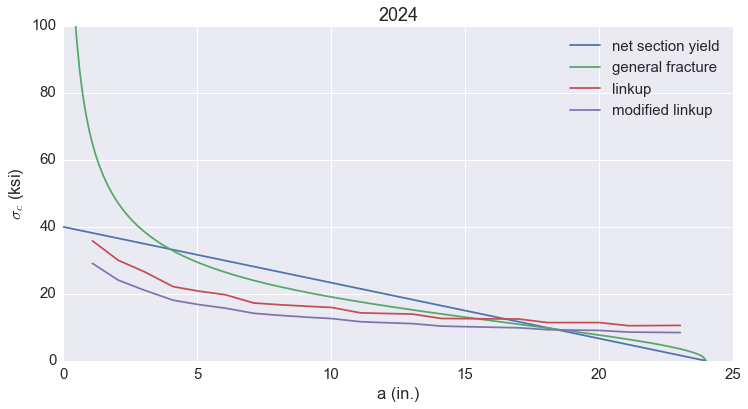

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

#panel properties
a0 = 0.0 #inches, initial crack length
W = 48.0 #inches, panel width
a = np.linspace(a0,W/2,200) #crack length array (from a0 to end of panel, W/2)
t = 0.063 #inches, panel thickness
c = 0.05 #inches, MSD crack(s)
d = 0.1875 #inches, hole diameter
r = d/2 #inches, hole radius
p = 1.0 #inches, hole pitch
l = c + r #inches, parameter for link-up equation

#2024
s_ys = 40.0 #ksi, yield strength
kc = 120.0 #ksi sqrt(in), fracture toughness
A1 = 0.3054 #b-basis
A2 = 1.3502 #b-basis

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))

#beta for crack near a hole, p. 53-54
beta_a = 0.934
beta_l = 2.268

s_msd = [] #empty array
s_msd_mod = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < c:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
        s_msd_mod.append(0)
    else:
        #otherwise we proceed with the usual calculation
        sc = s_ys*np.sqrt(2*L/(i*beta_a**2 + l*beta_l**2))
        s_msd.append(sc)
        #modified linkup
        sc_mod = sc/(A1*np.log(L) + A2)
        s_msd_mod.append(sc_mod)
        
        
#create line through local extrema
from scipy.signal import argrelextrema
s_msd = np.array(s_msd)
s_msd_mod = np.array(s_msd_mod)
vals = argrelextrema(s_msd,np.greater)
vals_mod = argrelextrema(s_msd_mod,np.greater)


plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
#plt.plot(a,s_msd,label='linkup')
plt.plot(a[vals],s_msd[vals],label='linkup')
plt.plot(a[vals_mod],s_msd_mod[vals_mod],label='modified linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.ylim([0,100])
plt.title('2024')

We can see the effect of using a constant $\beta$ for the lead crack in this plot, as the MSD predictions begin to taper off as the crack gets longer. On a real panel there are many complicated effects as the crack propagates (re-distribution of fastener loads at each of the holes, stiffeners and crack stoppers, etc.) so the variable $\beta$ is generally determined using Finite Elements.

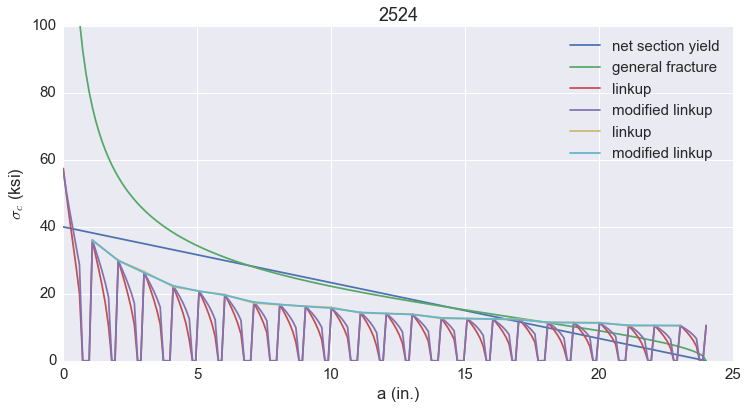

In [24]:
#2524
s_ys = 40.0 #ksi, yield strength
kc = 140.0 #ksi sqrt(in), fracture toughness
A1 = 0.2024 #b-basis
A2 = 1.0719 #b-basis

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))

#beta for crack near a hole, p. 53-54
beta_a = 0.934
beta_l = 2.268

s_msd = [] #empty array
s_msd_mod = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < c:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
        s_msd_mod.append(0)
    else:
        #otherwise we proceed with the usual calculation
        sc = s_ys*np.sqrt(2*L/(i*beta_a**2 + l*beta_l**2))
        s_msd.append(sc)
        #modified linkup
        sc_mod = sc/(A1*np.log(L) + A2)
        s_msd_mod.append(sc_mod)
        
        
#create line through local extrema
s_msd = np.array(s_msd)
s_msd_mod = np.array(s_msd_mod)
vals = argrelextrema(s_msd,np.greater)
vals_mod = argrelextrema(s_msd_mod,np.greater)


plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_msd,label='linkup')
plt.plot(a,s_msd_mod,label='modified linkup')
plt.plot(a[vals],s_msd[vals],label='linkup')
plt.plot(a[vals_mod],s_msd_mod[vals_mod],label='modified linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.ylim([0,100])
plt.title('2524')

It is interesting to note that the modified linkup equations do not change the strength prediction in any perceptible way for 2524. We can examine the effect of the modification by checking the value of $A_1 \ln(L) + A_2$

In [22]:
for L in np.linspace(0,p-d-c,10):
    print A1*np.log(L) + A2

-inf
0.596357557971
0.808044706914
0.93187375093
1.01973185586
1.08787989643
1.14356089987
1.19063851749
1.2314190048
1.26738994389


We observe that while the term does have some effects, they do not change the local maxima, and thus do not effect the residual strength.

For 7075 we will compare both (11.7) and (11.8)

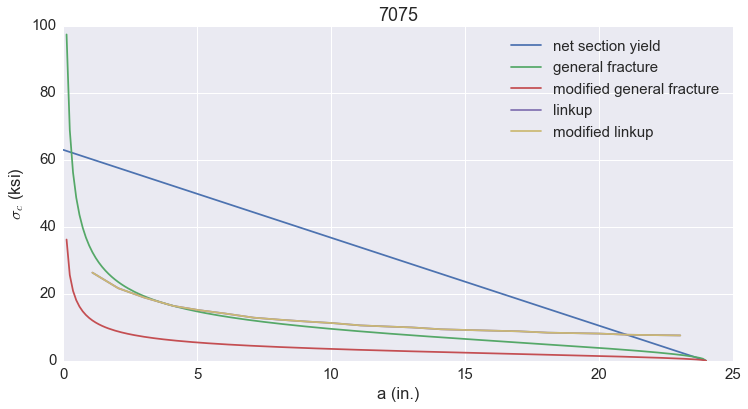

In [30]:
#7075
s_ys = 63.0 #ksi, yield strength
kc = 60.0 #ksi sqrt(in), fracture toughness
B1 = 1.417 #b-basis
B2 = 1.073 #b-basis

#net section yield
s_net = s_ys*(W/2-a)/(W/2)

#general fracture
s_frac = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W)))
#modified fracture, 11.8
s_frac_mod = kc/(np.sqrt(np.pi*a/np.cos(np.pi*a/W))*(.856-.946*np.log(l)))

#beta given in problem
beta_a = 0.934
beta_l = 2.268

s_msd = [] #empty array
s_msd_mod = [] #empty array
#loop through crack values to find L
for i in a:
    #i%1.5 gives remainder of i/1.5
    #calculate L
    L = p - d - c - i%p
    if L < 0:
        s_msd.append(0) #this means crack tip is inside a hole or msd crack
        s_msd_mod.append(0)
    else:
        #otherwise we proceed with the usual calculation
        beta_lead = np.sqrt(1./np.cos(np.pi*i/W))
        sc = s_ys*np.sqrt(2*L/(i*beta_a**2 + l*beta_l**2))
        s_msd.append(sc)
        sc_mod = sc/(B1+B2*L)
        s_msd_mod.append(sc_mod)

#create line through local extrema
s_msd = np.array(s_msd)
s_msd_mod = np.array(s_msd_mod)
vals = argrelextrema(s_msd,np.greater)
vals_mod = argrelextrema(s_msd_mod,np.greater)

plt.figure(figsize=(12,6))
plt.plot(a,s_net,label='net section yield')
plt.plot(a,s_frac,label='general fracture')
plt.plot(a,s_frac_mod,label='modified general fracture')
plt.plot(a[vals],s_msd_mod[vals],label='linkup')
plt.plot(a[vals_mod],s_msd_mod[vals_mod],label='modified linkup')
plt.legend(loc='best')
plt.xlabel('a (in.)')
plt.ylabel('$\sigma_c$ (ksi)')
plt.title('7075')

For 7075 we see that once again the modified linkup equation does not make a significant change, and also does not predict a lower failure than the general fracture criteria, except for very short cracks.

## 2

For the maximum circumferential stress criterion, we use (11.14) to solve for the crack extension angle

In [32]:
import numpy as np

tau = 1.0
sigma = 5.0
K_IC = 60.0 #ksi sqrt(in)
a = 0.5 #in

K_I = sigma*np.sqrt(np.pi*a)
K_II = tau*np.sqrt(np.pi*a)

#import a solver library to solve non-linear trig equations
from scipy import optimize

def myeqn(theta):
    return K_I*np.sin(theta) + K_II*(3*np.cos(theta)-1)

sol = optimize.root(myeqn,0)
theta_p = sol.x[0]
print theta_p*180/np.pi

-21.0887951343


We find the crack will extend along $\theta = -21.1^\circ$.

Next we substitute this angle into (11.15) to solve for the critical fracture stress.

In [33]:
print 3*np.cos(theta_p/2) + np.cos(3*theta_p/2)
print np.sin(theta_p/2) + np.sin(3*theta_p/2)

3.80076343783
-0.707476621034


Substituting into (11.15) we have
$$ 4(60) = 3.80 K_I - 3(-0.707)K_{II} $$
Since $\tau_c = \frac{1}{5} \sigma_c$, we can substitute and solve
$$ 240 = 3.80 \sigma_c \sqrt{.5 \pi} +2.121/5 \sigma_c \sqrt{.5 \pi} $$

In [36]:
sc = 240.0/(np.sqrt(np.pi*a)*(3.80+2.121/5.0))
print sc

45.3322036345


We find $\sigma_c = 45.3 \text{ ksi}$

For the principal stress criterion, we ignore the effects of the crack stress field and find the direction of the principal stresses using (11.17d)

In [38]:
theta_p = np.arctan(2.0*tau/(-sigma))/2.0
print theta_p*180/np.pi

-10.9007047432


Here we find that $\theta_p = -10.9^\circ$, which we can substitute into (11.17b) to find the hoop stress in the principal direction.

In [39]:
sigma_theta = sigma*np.cos(theta_p)**2 - 2*tau*np.sin(theta_p)*np.cos(theta_p)
print sigma_theta

5.19258240357


Thus $\sigma_\theta = 5.19 \tau$ or $\sigma_\theta = 5.19/5.0 \sigma$

We can now find $\sigma_c$ according to (11.19)

In [41]:
sc = K_IC/(sigma_theta/sigma*np.sqrt(np.pi*a))
print sc

46.0975579466


And we predict $\sigma_c = 46.1 \text{ ksi}$. Although the principal stress criterion gives a poor prediction of crack propagation angle, and a non-conservative failure stress prediction, the failure stress predicted is not very far away from the predictions of the maximum circumferential stress criterion.

## 3

To estimate the stress intensity factor in this case, we will use the maximum circumferential stress criterion. We can find the principal direction of the stress using (11.14) and then use that to find the combined stress intensity factor from (11.15).

In Homework 1 we found that $K_I = 13.4 \text{ ksi} \sqrt{\text{in}}$ with $\sigma = 12.9 \text{ ksi}$.

In this problem we will also include the effects of shear. Since the shear stress is 0 at the surface of the beam, let us consider the lower surface of the I-beam, where some shear stress will be present (but the tensile stress will be lower).

At this surface, we have $\sigma = 11.7 \text{ ksi}$ and $K_I = 12.1 \text{ ksi} \sqrt{\text{in}}$, while the shear is given by
$$ \tau = \frac{FA\bar{y}}{I(D-d)/2}$$

Where $(D-d)/2$ is the flange thickness

In [46]:
a = 0.3 #in, crack length
I = 68.35 #in^4, moment of inertia for i-beam
A = .378*5.268 #in^2, Area of i-beam flange
t = 0.378 #in, thickness of i-beam flange
F = 3000 #lbs, applied force
yb = 8.14/2 #inches, distance from neutral axis to flange
tau = F*A*yb/(t*I)/1000 #ksi, shear stress at bottom of i-beam flange
print tau
K_II = tau*np.sqrt(np.pi*a)
print K_II

0.941072128749
0.913605015382


Thus the shear stress is $\tau = 0.941 \text{ ksi}$ which produces a Mode II stress intensity of $K_{II} = 0.914 \text{ ksi}\sqrt{\text{in}}$

In [47]:
K_I = 12.1
def myeqn(theta):
    return K_I*np.sin(theta) + K_II*(3*np.cos(theta)-1)

sol = optimize.root(myeqn,0)
theta_p = sol.x[0]
print theta_p*180/np.pi

-11.5854112647


We find the crack propogation angle is $\theta_p = -11.6^\circ$, which gives a combined stress intensity factor of

In [51]:
K_combined = K_I/4*(3*np.cos(theta_p/2) + np.cos(3*theta_p/2)) - 3*K_II/4*(np.sin(theta_p/2) + np.sin(3*theta_p/2))
print K_combined

12.2912052352


So the combined mixed-mode stress intensity factor is equivalent to a Mode I stress intensity of 12.3 $\text{ksi}\sqrt{\text{in}}$. This is smaller than the Mode I stress intensity at the top of the beam, so we find that in this case the contributions of the shear stress are negligible.